<a href="https://colab.research.google.com/github/davidjonathan01/AnalisisCasosCovid_PrimeraLimpieza/blob/main/Limpieza_Union_Datasets_Analisis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Extraccion de datasets covid y obesidad

Leemos el dataset de covid

In [ ]:
#Carga de dataset
import pandas as pd

covid = pd.read_csv('covid.csv', sep=';')

In [ ]:
covid

,cases,deaths,countriesAndTerritories,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,0,0,Afghanistan,Asia,NaN
1,0,0,Algeria,Africa,NaN
2,0,0,Armenia,Europe,NaN
3,0,0,Australia,Oceania,NaN
4,0,0,Austria,Europe,NaN
...,...,...,...,...,...
61895,0,0,Wallis and Futuna,Oceania,NaN
61896,0,0,Western Sahara,Africa,0.000000
61897,0,0,Yemen,Asia,0.020575
61898,57,1,Zambia,Africa,3.728787


Verificamos su tipo de datos , estadisticos y hacemos limpieza necesaria

In [ ]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61900 entries, 0 to 61899
Data columns (total 5 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   cases                                                       61900 non-null  int64  
 1   deaths                                                      61900 non-null  int64  
 2   countriesAndTerritories                                     61900 non-null  object 
 3   continentExp                                                61900 non-null  object 
 4   Cumulative_number_for_14_days_of_COVID-19_cases_per_100000  59021 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 2.4+ MB


In [ ]:
covid.count()

cases                                                         61900
deaths                                                        61900
countriesAndTerritories                                       61900
continentExp                                                  61900
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000    59021
dtype: int64

In [ ]:
covid.dropna(axis=0, inplace= True)

In [ ]:
covid.count()

cases                                                         59021
deaths                                                        59021
countriesAndTerritories                                       59021
continentExp                                                  59021
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000    59021
dtype: int64

In [ ]:
covid.describe()

,cases,deaths,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
count,59021.000000,59021.000000,59021.000000
mean,1211.297420,27.322783,66.320586
std,6937.716248,134.260984,162.329240
min,-8261.000000,-1918.000000,-147.419587
25%,0.000000,0.000000,0.757526
50%,20.000000,0.000000,6.724045
75%,309.000000,5.000000,52.572719
max,234633.000000,4928.000000,1900.836210


Aplicamos filtrado y eliminacion de filas innecesarias

In [ ]:
covid= covid[(covid["cases"]>=0) & (covid["deaths"]>=0) & (covid["Cumulative_number_for_14_days_of_COVID-19_cases_per_100000"]>=0)]

Evaluamos el data set luego de eliminar filas con valores absurdos

In [ ]:
covid.describe()

,cases,deaths,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
count,58959.000000,58959.000000,58959.000000
mean,1212.754168,27.316135,66.402666
std,6941.109276,133.162595,162.373044
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.763241
50%,20.000000,0.000000,6.732521
75%,310.000000,5.000000,52.601692
max,234633.000000,4928.000000,1900.836210


Renombramos columnas a español

In [ ]:
covid.rename(columns = {
     'cases': 'Casos',
     'deaths': 'Muertes',
     'countriesAndTerritories': 'Lugar',
     'continentExp': 'Continente',
     'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000': 'Casos_por_100000_hab_ultimos_14_dias'} , inplace= True)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_22832\1148080038.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid.rename(columns = {


Ahora leemos el data obesidad

In [ ]:

obesidad = pd.read_excel("data_obewsidad.xlsx")
obesidad

,"Countries, territories and areas",Obesity_BothSexes_Value,Obesity_Male_Value,Obesity_Female_Value,Obesity_BothSexes_RangeLower,Obesity_BothSexes_RangeUpper,Obesity_Male_RangeLower,Obesity_Male_RangeUpper,Obesity_Female_RangeLower,Obesity_Female_RangeUpper
0,Afghanistan,19.7,17.1,22.2,15.8,24.0,11.8,23.6,16.8,28.5
1,Albania,58.7,64.9,52.8,53.8,63.5,57.9,71.4,45.8,59.6
2,Algeria,60.7,56.7,64.8,56.0,65.4,49.7,63.5,58.3,71.0
3,Andorra,68.1,74.5,61.9,63.1,72.7,67.8,80.3,54.6,68.8
4,Angola,23.9,17.2,30.4,19.0,29.2,10.9,24.1,23.1,38.5
...,...,...,...,...,...,...,...,...,...,...
190,Venezuela (Bolivarian Republic of),62.6,62,63.2,58.4,66.9,55.9,68.2,57.1,69.1
191,Viet Nam,18.3,15.9,20.5,14.7,21.7,11.5,21.0,15.6,25.8
192,Yemen,42.3,38.3,46.3,37.5,47.3,31.0,45.4,39.5,53.0
193,Zambia,23.9,16.7,31,20.2,27.9,11.8,22.5,25.6,36.9


Renombramos sus columnas

In [ ]:
obesidad.columns

Index(['Countries, territories and areas', 'Obesity_BothSexes_Value',
       'Obesity_Male_Value', 'Obesity_Female_Value',
       'Obesity_BothSexes_RangeLower', 'Obesity_BothSexes_RangeUpper',
       'Obesity_Male_RangeLower', 'Obesity_Male_RangeUpper',
       'Obesity_Female_RangeLower', 'Obesity_Female_RangeUpper'],
      dtype='object')

In [ ]:
obesidad = obesidad.rename(columns={
    'Countries, territories and areas': 'Lugar',
    'Obesity_BothSexes_Value': 'Obesidad_TodosLosSexos_Valor',
    'Obesity_Male_Value': 'Obesidad_Hombres_Valor',
    'Obesity_Female_Value': 'Obesidad_Mujeres_Valor',
    'Obesity_BothSexes_RangeLower': 'Obesidad_TodosLosSexos_RangoInferior',
    'Obesity_BothSexes_RangeUpper': 'Obesidad_TodosLosSexos_RangoSuperior',
    'Obesity_Male_RangeLower': 'Obesidad_Hombres_RangoInferior',
    'Obesity_Male_RangeUpper': 'Obesidad_Hombres_RangoSuperior',
    'Obesity_Female_RangeLower': 'Obesidad_Mujeres_RangoInferior',
    'Obesity_Female_RangeUpper': 'Obesidad_Mujeres_RangoSuperior'
})

In [ ]:
obesidad.columns

Index(['Lugar', 'Obesidad_TodosLosSexos_Valor', 'Obesidad_Hombres_Valor',
       'Obesidad_Mujeres_Valor', 'Obesidad_TodosLosSexos_RangoInferior',
       'Obesidad_TodosLosSexos_RangoSuperior',
       'Obesidad_Hombres_RangoInferior', 'Obesidad_Hombres_RangoSuperior',
       'Obesidad_Mujeres_RangoInferior', 'Obesidad_Mujeres_RangoSuperior'],
      dtype='object')

## Combinacion de tablas

Combinamos las tablas tomando como referencia el Lugar

In [ ]:
Consolidado = pd.merge(covid, obesidad, on='Lugar', how='inner')

In [ ]:
Consolidado

,Casos,Muertes,Lugar,Continente,Casos_por_100000_hab_ultimos_14_dias,Obesidad_TodosLosSexos_Valor,Obesidad_Hombres_Valor,Obesidad_Mujeres_Valor,Obesidad_TodosLosSexos_RangoInferior,Obesidad_TodosLosSexos_RangoSuperior,Obesidad_Hombres_RangoInferior,Obesidad_Hombres_RangoSuperior,Obesidad_Mujeres_RangoInferior,Obesidad_Mujeres_RangoSuperior
0,0,0,Afghanistan,Asia,0.000000,19.7,17.1,22.2,15.8,24.0,11.8,23.6,16.8,28.5
1,0,0,Algeria,Africa,0.000000,60.7,56.7,64.8,56.0,65.4,49.7,63.5,58.3,71.0
2,0,0,Armenia,Europe,0.000000,55.7,54.6,56.9,50.6,60.5,46.8,61.6,49.8,63.4
3,0,0,Australia,Oceania,0.000000,67.2,73.3,61.3,63.6,70.6,68.4,77.8,55.9,66.5
4,0,0,Austria,Europe,0.000000,58.1,65.3,51.3,53.3,62.5,58.5,71.5,45.0,57.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47235,138,0,Uzbekistan,Asia,6.743130,45.7,44.9,46.5,40.5,51.0,37.2,52.4,39.4,53.8
47236,0,0,Vanuatu,Oceania,0.000000,54.1,49.4,58.9,48.0,60.1,40.4,58.2,51.0,66.6
47237,0,0,Yemen,Asia,0.020575,42.3,38.3,46.3,37.5,47.3,31.0,45.4,39.5,53.0
47238,57,1,Zambia,Africa,3.728787,23.9,16.7,31,20.2,27.9,11.8,22.5,25.6,36.9


Verificamos registros duplicados y los eliminamos

In [ ]:
Consolidado.duplicated().sum()

np.int64(8539)

In [ ]:
Consolidado= Consolidado.drop_duplicates()
Consolidado

,Casos,Muertes,Lugar,Continente,Casos_por_100000_hab_ultimos_14_dias,Obesidad_TodosLosSexos_Valor,Obesidad_Hombres_Valor,Obesidad_Mujeres_Valor,Obesidad_TodosLosSexos_RangoInferior,Obesidad_TodosLosSexos_RangoSuperior,Obesidad_Hombres_RangoInferior,Obesidad_Hombres_RangoSuperior,Obesidad_Mujeres_RangoInferior,Obesidad_Mujeres_RangoSuperior
0,0,0,Afghanistan,Asia,0.000000,19.7,17.1,22.2,15.8,24.0,11.8,23.6,16.8,28.5
1,0,0,Algeria,Africa,0.000000,60.7,56.7,64.8,56.0,65.4,49.7,63.5,58.3,71.0
2,0,0,Armenia,Europe,0.000000,55.7,54.6,56.9,50.6,60.5,46.8,61.6,49.8,63.4
3,0,0,Australia,Oceania,0.000000,67.2,73.3,61.3,63.6,70.6,68.4,77.8,55.9,66.5
4,0,0,Austria,Europe,0.000000,58.1,65.3,51.3,53.3,62.5,58.5,71.5,45.0,57.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47233,189723,1340,United States of America,America,873.211592,70.2,74.8,65.8,66.8,73.3,70.4,79.0,61.0,70.4
47234,528,1,Uruguay,America,115.318030,64.5,65.9,63.3,59.8,69.2,59.2,72.3,56.4,69.9
47235,138,0,Uzbekistan,Asia,6.743130,45.7,44.9,46.5,40.5,51.0,37.2,52.4,39.4,53.8
47238,57,1,Zambia,Africa,3.728787,23.9,16.7,31,20.2,27.9,11.8,22.5,25.6,36.9


In [ ]:
Consolidado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38701 entries, 0 to 47239
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Casos                                 38701 non-null  int64  
 1   Muertes                               38701 non-null  int64  
 2   Lugar                                 38701 non-null  object 
 3   Continente                            38701 non-null  object 
 4   Casos_por_100000_hab_ultimos_14_dias  38701 non-null  float64
 5   Obesidad_TodosLosSexos_Valor          38701 non-null  object 
 6   Obesidad_Hombres_Valor                38701 non-null  object 
 7   Obesidad_Mujeres_Valor                38701 non-null  object 
 8   Obesidad_TodosLosSexos_RangoInferior  37917 non-null  float64
 9   Obesidad_TodosLosSexos_RangoSuperior  37917 non-null  float64
 10  Obesidad_Hombres_RangoInferior        37917 non-null  float64
 11  Obesidad_Hombres_Ran

Eliminamos filas que quedan aun vacias o inconsistentes

In [ ]:
Consolidado= Consolidado[(Consolidado["Obesidad_TodosLosSexos_Valor"] != "No data")]

## Observando si hay relacion lineal

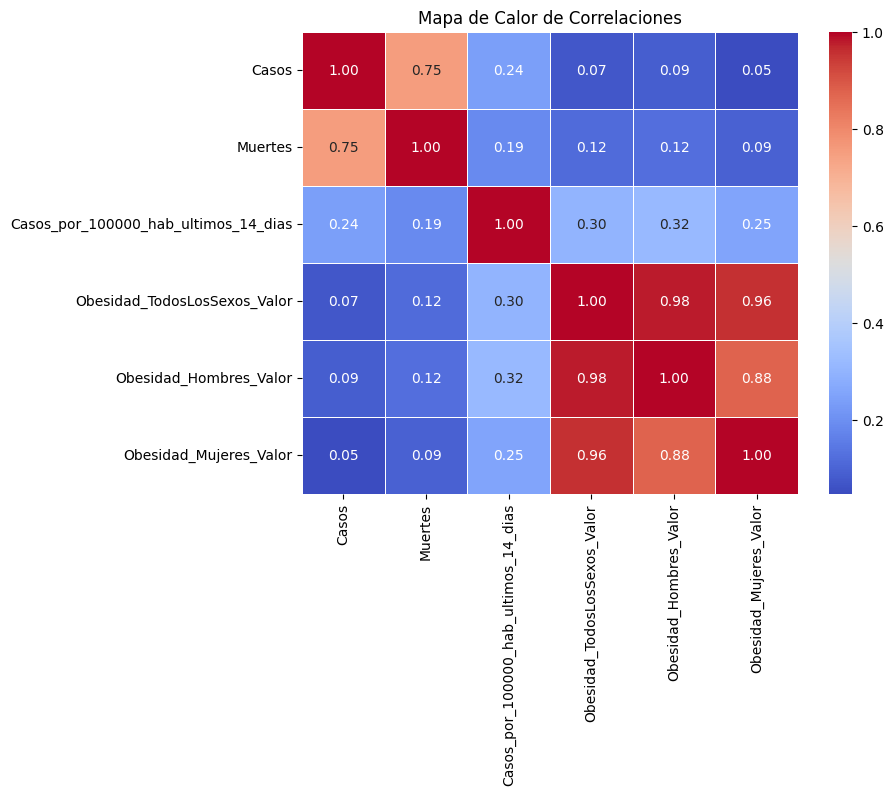

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Suponiendo que tu DataFrame se llama 'Consolidado'
# 1. Mapa de Calor de Correlaciones
correlation_matrix = Consolidado[['Casos', 'Muertes','Casos_por_100000_hab_ultimos_14_dias', 'Obesidad_TodosLosSexos_Valor',
                                  'Obesidad_Hombres_Valor', 'Obesidad_Mujeres_Valor']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Mapa de Calor de Correlaciones')
plt.show()

<Axes: xlabel='Obesidad_Hombres_Valor', ylabel='Muertes'>

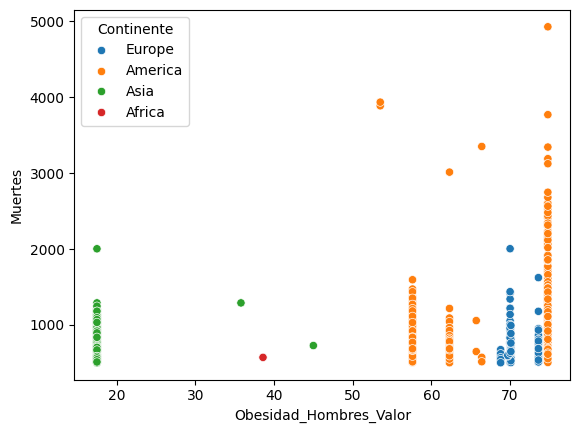

In [ ]:
sns.scatterplot(x= 'Obesidad_Hombres_Valor', y='Muertes', data= Consolidado, hue='Continente')

## Se concluye que no hay una relacion lineal entre variables de muerte o casos con la obesidad como tal

In [ ]:
correlation = Consolidado['Muertes'].corr(Consolidado['Obesidad_TodosLosSexos_Valor'])
print(f"Correlación de Pearson: {correlation}")


Correlación de Pearson: 0.11584016228095398


## Cantidad de muertes por intervalo

C:\Users\Usuario\AppData\Local\Temp\ipykernel_22832\3112886434.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Consolidado['Obesidad_Hombres_Rango'] = pd.cut(Consolidado['Obesidad_Hombres_Valor'], bins=range(20, 85, 10), right=False)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_22832\3112886434.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Consolidado['Obesidad_Mujeres_Rango'] = pd.cut(Consolidado['Obesidad_Mujeres_Valor'], bins=range(20, 85, 10), right=False)
C:\Users\Usuario\AppData\Local\Temp\

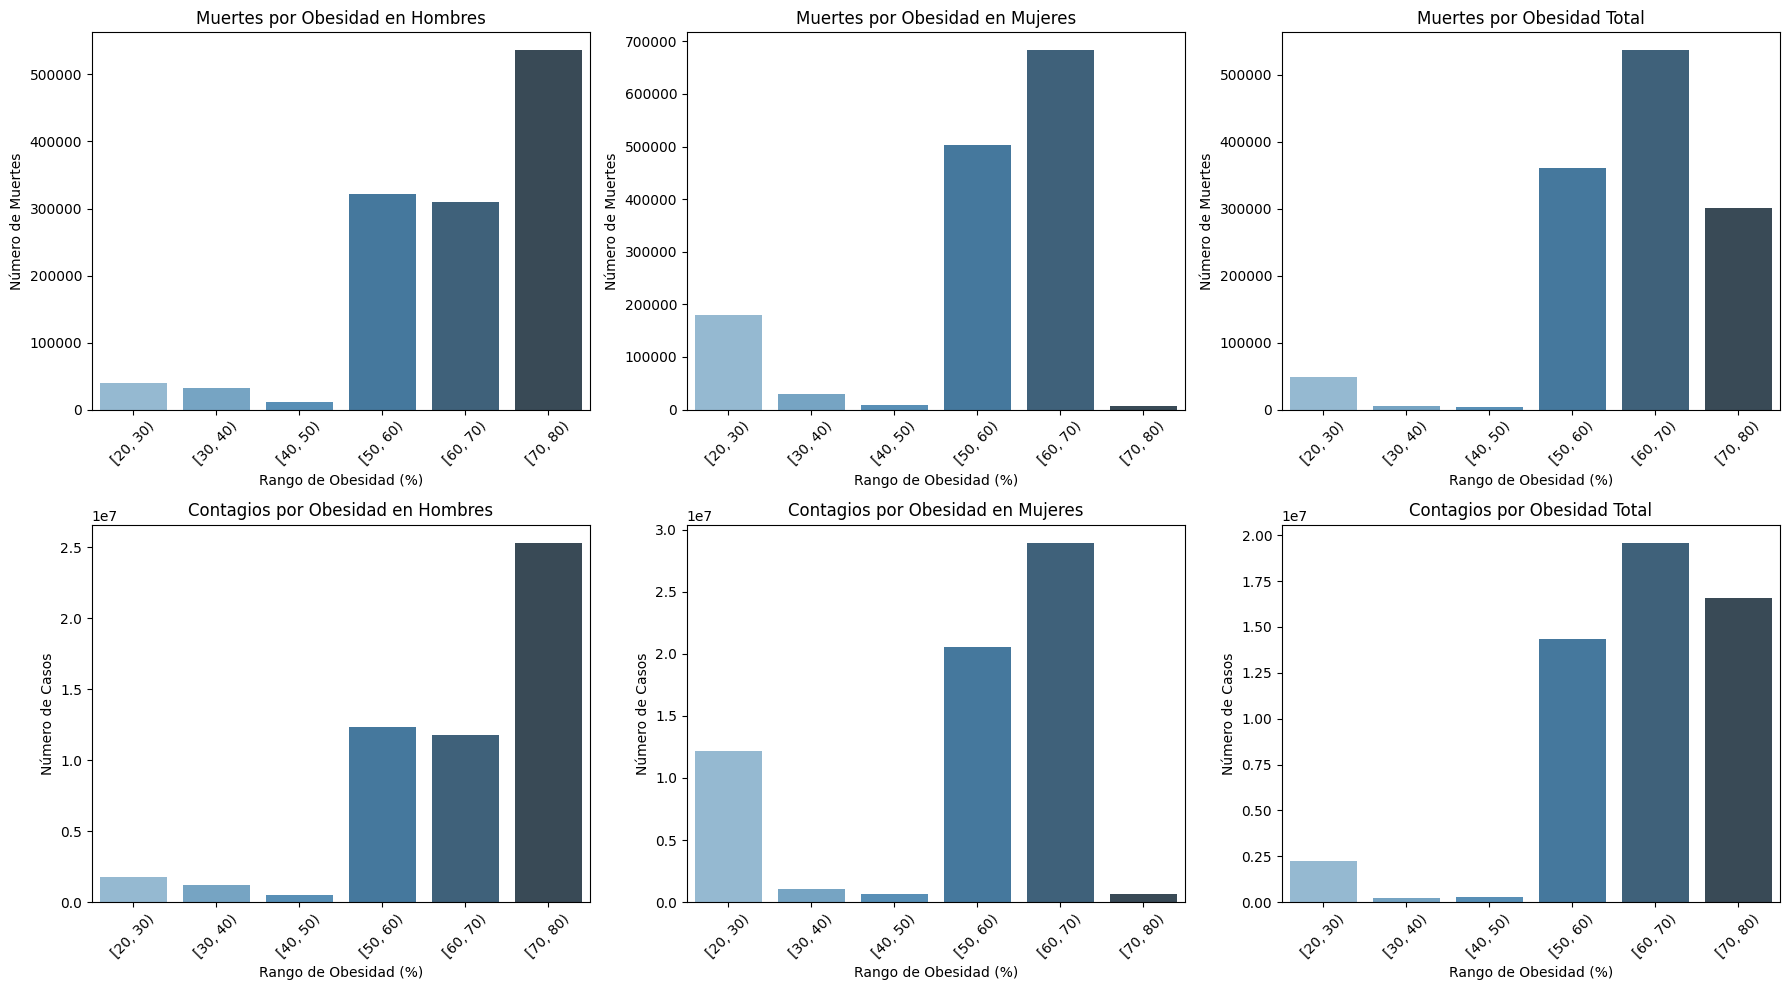

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


Consolidado['Obesidad_Hombres_Rango'] = pd.cut(Consolidado['Obesidad_Hombres_Valor'], bins=range(20, 85, 10), right=False)
Consolidado['Obesidad_Mujeres_Rango'] = pd.cut(Consolidado['Obesidad_Mujeres_Valor'], bins=range(20, 85, 10), right=False)
Consolidado['Obesidad_TodosLosSexos_Rango'] = pd.cut(Consolidado['Obesidad_TodosLosSexos_Valor'], bins=range(20, 85, 10), right=False)


muertes_por_rango_hombres = Consolidado.groupby('Obesidad_Hombres_Rango')['Muertes'].sum()
muertes_por_rango_mujeres = Consolidado.groupby('Obesidad_Mujeres_Rango')['Muertes'].sum()
muertes_por_rango_total = Consolidado.groupby('Obesidad_TodosLosSexos_Rango')['Muertes'].sum()

contagios_por_rango_hombres = Consolidado.groupby('Obesidad_Hombres_Rango')['Casos'].sum()
contagios_por_rango_mujeres = Consolidado.groupby('Obesidad_Mujeres_Rango')['Casos'].sum()
contagios_por_rango_total = Consolidado.groupby('Obesidad_TodosLosSexos_Rango')['Casos'].sum()


fig, axes = plt.subplots(2, 3, figsize=(18,10))

# Muertes por rango de obesidad en hombres
sns.barplot(x=muertes_por_rango_hombres.index.astype(str), y=muertes_por_rango_hombres.values, palette='Blues_d', ax=axes[0, 0])
axes[0, 0].set_title('Muertes por Obesidad en Hombres')
axes[0, 0].set_xlabel('Rango de Obesidad (%)')
axes[0, 0].set_ylabel('Número de Muertes')
axes[0, 0].tick_params(axis='x', rotation=45)

# Muertes por rango de obesidad en mujeres
sns.barplot(x=muertes_por_rango_mujeres.index.astype(str), y=muertes_por_rango_mujeres.values, palette='Blues_d', ax=axes[0, 1])
axes[0, 1].set_title('Muertes por Obesidad en Mujeres')
axes[0, 1].set_xlabel('Rango de Obesidad (%)')
axes[0, 1].set_ylabel('Número de Muertes')
axes[0, 1].tick_params(axis='x', rotation=45)

# Muertes por rango de obesidad total
sns.barplot(x=muertes_por_rango_total.index.astype(str), y=muertes_por_rango_total.values, palette='Blues_d', ax=axes[0, 2])
axes[0, 2].set_title('Muertes por Obesidad Total')
axes[0, 2].set_xlabel('Rango de Obesidad (%)')
axes[0, 2].set_ylabel('Número de Muertes')
axes[0, 2].tick_params(axis='x', rotation=45)

# Contagios por rango de obesidad en hombres
sns.barplot(x=contagios_por_rango_hombres.index.astype(str), y=contagios_por_rango_hombres.values, palette='Blues_d', ax=axes[1, 0])
axes[1, 0].set_title('Contagios por Obesidad en Hombres')
axes[1, 0].set_xlabel('Rango de Obesidad (%)')
axes[1, 0].set_ylabel('Número de Casos')
axes[1, 0].tick_params(axis='x', rotation=45)

# Contagios por rango de obesidad en mujeres
sns.barplot(x=contagios_por_rango_mujeres.index.astype(str), y=contagios_por_rango_mujeres.values, palette='Blues_d', ax=axes[1, 1])
axes[1, 1].set_title('Contagios por Obesidad en Mujeres')
axes[1, 1].set_xlabel('Rango de Obesidad (%)')
axes[1, 1].set_ylabel('Número de Casos')
axes[1, 1].tick_params(axis='x', rotation=45)

# Contagios por rango de obesidad total
sns.barplot(x=contagios_por_rango_total.index.astype(str), y=contagios_por_rango_total.values, palette='Blues_d', ax=axes[1, 2])
axes[1, 2].set_title('Contagios por Obesidad Total')
axes[1, 2].set_xlabel('Rango de Obesidad (%)')
axes[1, 2].set_ylabel('Número de Casos')
axes[1, 2].tick_params(axis='x', rotation=45)

# Ajuste de los gráficos
plt.tight_layout()
plt.show()


Observamos que en su mayoria de casos de contagios y muertes muchas de ellas coinciden con intervalos mayores en obesidad  